# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [58]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

student_data = pd.DataFrame({'StudentID': [1, 2, 3, 4, 5, 6 ,7, 8, 9, 10], 'Age': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Tardies':[10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})
student_data

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4
5,6,48,2
6,7,19,9
7,8,26,6
8,9,54,0
9,10,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

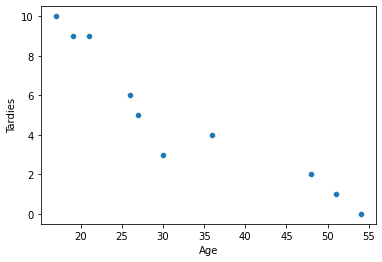

In [59]:
sns.scatterplot(student_data['Age'], student_data['Tardies'])
#Vemos la dispersion que tiene la edad con los dias que llegan tarde, para ver de que manera se relacionan.


Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [26]:
#Se puede intuir una recta con pendiente negativa. Esto quiere decir que, generalmente, los alumnos mas mayores llegan menos dias tarde.
#Por supuesto, hay algunos valores que se salen de la norma.

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [60]:
cov = student_data.cov()
corr = student_data.corr()
print('COVARIANZAS')
print(cov)
print('\n')
print('CORRELACION')
print(corr)

#las covarianzas compara variable por variable como varian. De esta manera, cuando más grande y positiva, quiere decir que a mayor valor de una variable, mayores valores de la otra vamos a encontrar
#Cuando la covarianza es negativa, cuando más altos los valoes de una variable, más pequeños son los de la otra. De esto obtenemos que, como la covarianza entre edad y dias que han llegado tarde es negativa, cuanto menor es la edad, más dias llega tarde
#La tabla de correlacion indica como de relacionadas están dos variables entre si. cuanto más se acerque a 1, más correlacion positiva, mientras que cuanto más cercano a -1, más correlacion negativa
#Si se acerca a 0 quiere decir que las variables no se relacionan entre si. Obviamente, entre las mismas variables la correlacion va a ser 1.
#Se puede observar que la edad y los dias tarde tienen una correlacion de -0.93. Esto indica que los dias que llega tarde depende de la edad, de manera negativa.

COVARIANZAS
           StudentID         Age    Tardies
StudentID   9.166667    7.722222  -3.722222
Age         7.722222  187.655556 -45.566667
Tardies    -3.722222  -45.566667  12.544444


CORRELACION
           StudentID       Age   Tardies
StudentID   1.000000  0.186190 -0.347113
Age         0.186190  1.000000 -0.939163
Tardies    -0.347113 -0.939163  1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [61]:
import statsmodels.api as sm
import pylab as plt
def plot_regression_model(x,y):
    
    x_const = sm.add_constant(x) 
    
    modelo = sm.OLS(y, x_const).fit() 
    
    pred = modelo.predict(x_const) 
    
    print(modelo.summary());
    
plot_regression_model(student_data['Age'], student_data['Tardies'])

#como antes hemos intuido una recta, hemos hecho una regresion lineal, con la edad y con los dias tarde.
#Nos sale una recta, como habíamos visto, de pendiente negativa

                            OLS Regression Results                            
Dep. Variable:                Tardies   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           5.57e-05
Time:                        11:15:42   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8888      1.111     11.605      0.0

Plot your regression model on your scatter plot.

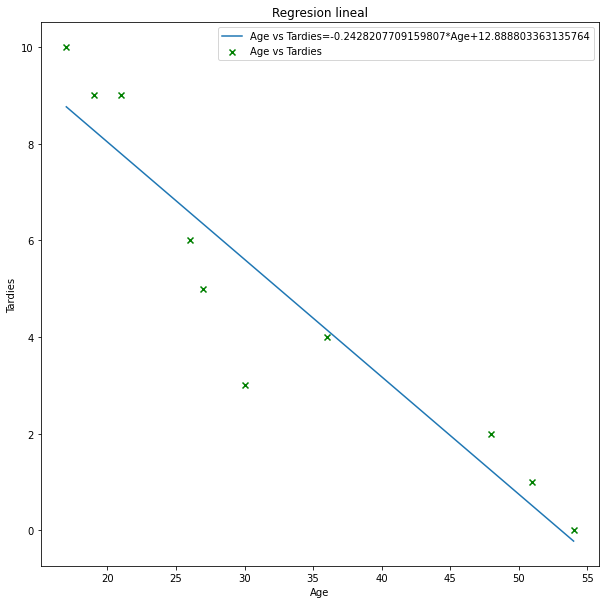

In [62]:
def dibujar_regresion(x, y):
    x_const = sm.add_constant(x)
    modelo = sm.OLS(y, x_const).fit()
    try:
        const = modelo.params[0] 
        coef = modelo.params[1]

        x_l=np.linspace(x.min(), x.max(), 50) 
        y_l= coef*x_l + const

        plt.figure(figsize=(10, 10));

        # plot the line
        plt.plot(x_l, y_l, label=f'{x.name} vs {y.name}={coef}*{x.name}+{const}');

        # data
        plt.scatter(x, y, marker='x', c='g', label=f'{x.name} vs {y.name}');

        plt.title('Regresion lineal')
        plt.xlabel(f'{x.name}')
        plt.ylabel(f'{y.name}')
        plt.legend()
        plt.show();
        return modelo
    except:
        print('No se puede imprimir la recta de regresión para modelos multivariable')
        plt.show();
        return modelo
    
dibujar_regresion(student_data['Age'], student_data['Tardies'])

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# De la gráfica vemos que, aunque hayamos supuesto una regresion lineal, con los pocos datos que hay no se ajusta bien la recta.
#Si quisieramos ver con más exactitud si tiene o no una dependencia lineal, necesitaríamos más datos 
#De cualquier manera, con los datos obtenidos por la covarianza y la correlación, sí que parece que el numero de días que legan tarde depende de la edad.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [65]:
import pandas as pd
vehiculos = pd.read_csv('C:/Users/Usuario/Desktop/ANA/UNIVERSIDAD/SEGUNDO/IRONHACK/Apuntes-de-Clase/Apuntes-de-Clase/data/vehicles.csv')
vehiculos.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [81]:
corr_v = vehiculos.corr()
corr_v
corr_v['CO2 Emission Grams/Mile']
#Las correlaciones más altas del CO2 es con Fuel Barrels/Year, con una correlacion de 0.98
#la variablel menos útil es Year, con una correlacion de -0.22.

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [89]:
x_const = sm.add_constant(vehiculos['Fuel Barrels/Year']) 
y = vehiculos['CO2 Emission Grams/Mile']
    
modelo = sm.OLS(y, x_const).fit() 
pred = modelo.predict(x_const)
print(modelo.summary())
#Vamos a construir una regresion lineal con la variable más correlacionada con el CO2, el Fuel Barrels/Year

                               OLS Regression Results                              
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.973
Model:                                 OLS   Adj. R-squared:                  0.973
Method:                      Least Squares   F-statistic:                 1.275e+06
Date:                     Wed, 16 Nov 2022   Prob (F-statistic):               0.00
Time:                             11:48:32   Log-Likelihood:            -1.5821e+05
No. Observations:                    35952   AIC:                         3.164e+05
Df Residuals:                        35950   BIC:                         3.164e+05
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

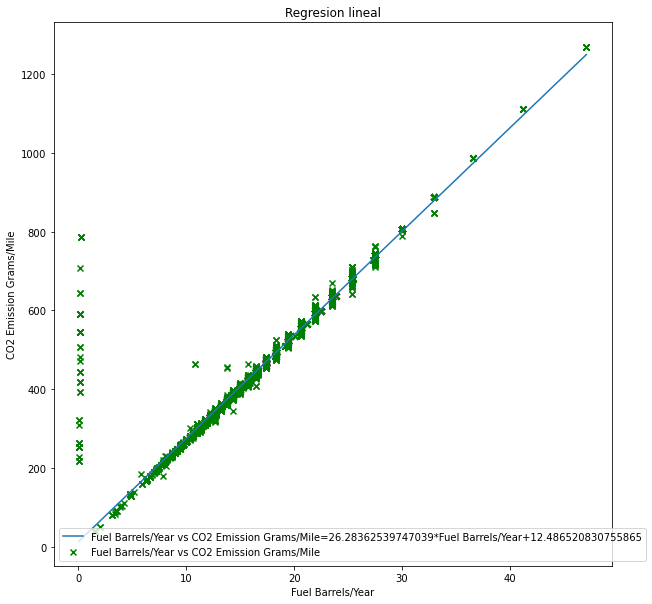

In [88]:
dibujar_regresion(vehiculos['Fuel Barrels/Year'], vehiculos['CO2 Emission Grams/Mile'])
#Las variables más importantes son las que hemos usado para crear la regresion lineal.
#En la gráfica se puede ver como efectivamente hay una dependencia lineal, aunque con algo de error y algunos valores extremos

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [116]:
party = pd.DataFrame({'Invitados': [1, 3, 4, 6, 8, 9, 11, 14], 'Vinieron': [1, 2, 4, 4, 5, 7, 8, 13]})
party

,Invitados,Vinieron
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

AxesSubplot(0.125,0.125;0.775x0.755)


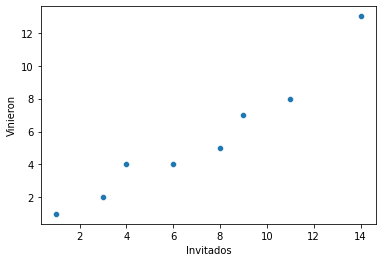

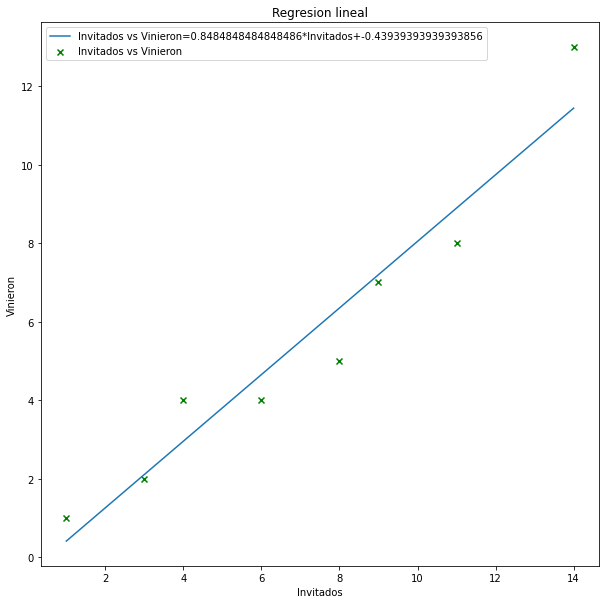

In [117]:
print(sns.scatterplot(party['Invitados'], party['Vinieron']))
dibujar_regresion(party['Invitados'], party['Vinieron'])

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [118]:
plot_regression_model(party['Invitados'], party['Vinieron'])
#De la gráfica vemos que los datos no se ajustan mucho a la recta excepto por 2.
#Hay una dependencia linea, ya que la trayectoria la sigue, pero vemos que el error es muy grande.

                            OLS Regression Results                            
Dep. Variable:               Vinieron   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     81.81
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           0.000102
Time:                        12:19:10   Log-Likelihood:                -10.800
No. Observations:                   8   AIC:                             25.60
Df Residuals:                       6   BIC:                             25.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4394      0.759     -0.579      0.5

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [119]:
party.drop(7, axis = 0, inplace = True)
print(party)


   Invitados  Vinieron
0          1         1
1          3         2
2          4         4
3          6         4
4          8         5
5          9         7
6         11         8


In [121]:
party.drop(2, axis = 0, inplace = True)

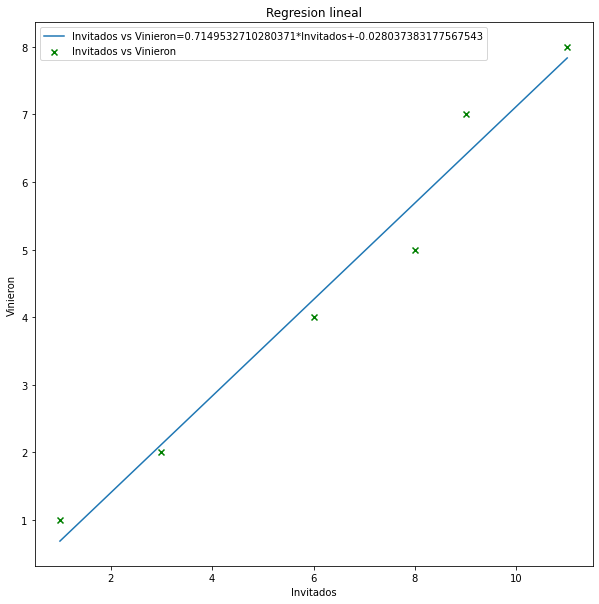

                            OLS Regression Results                            
Dep. Variable:               Vinieron   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     140.6
Date:                Wed, 16 Nov 2022   Prob (F-statistic):           0.000290
Time:                        12:20:34   Log-Likelihood:                -3.2485
No. Observations:                   6   AIC:                             10.50
Df Residuals:                       4   BIC:                             10.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0280      0.435     -0.064      0.9

In [123]:
dibujar_regresion(party['Invitados'], party['Vinieron'])
plot_regression_model(party['Invitados'], party['Vinieron'])

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
#Al quitar los dos datos más extremos, el error de la recta ahora es menor. 
#Por tanto, concluimos que ahora los datos tienen más dependencia lineal. Aun así, necesitaríamos más datos para afirmar algo definitivo.